In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import pickle

%matplotlib inline

In [2]:
data = pd.read_csv("./data/data.csv")

In [3]:
data.columns

feat_cols = ['valence', 'acousticness', 'danceability', 'energy', 
             'instrumentalness', 'liveness', 'loudness', 'speechiness']

X = data[feat_cols]

In [4]:
X.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
0,0.0594,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366
1,0.9630,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150
2,0.0394,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339
3,0.1650,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354
4,0.2530,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   acousticness      170653 non-null  float64
 2   danceability      170653 non-null  float64
 3   energy            170653 non-null  float64
 4   instrumentalness  170653 non-null  float64
 5   liveness          170653 non-null  float64
 6   loudness          170653 non-null  float64
 7   speechiness       170653 non-null  float64
dtypes: float64(8)
memory usage: 10.4 MB


In [6]:
X.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,0.502115,0.537396,0.482389,0.167010,0.205839,-11.467990,0.098393
std,0.263171,0.376032,0.176138,0.267646,0.313475,0.174805,5.697943,0.162740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000
25%,0.317000,0.102000,0.415000,0.255000,0.000000,0.098800,-14.615000,0.034900
50%,0.540000,0.516000,0.548000,0.471000,0.000216,0.136000,-10.580000,0.045000
75%,0.747000,0.893000,0.668000,0.703000,0.102000,0.261000,-7.183000,0.075600
max,1.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.970000


In [7]:
## Scale loudness to be between 0 and 1

from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()

loudness = X["loudness"].values
X["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))

<ipython-input-7-343353e4c333>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))


In [8]:
X.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,0.502115,0.537396,0.482389,0.167010,0.205839,0.760035,0.098393
std,0.263171,0.376032,0.176138,0.267646,0.313475,0.174805,0.089233,0.162740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,0.102000,0.415000,0.255000,0.000000,0.098800,0.710751,0.034900
50%,0.540000,0.516000,0.548000,0.471000,0.000216,0.136000,0.773941,0.045000
75%,0.747000,0.893000,0.668000,0.703000,0.102000,0.261000,0.827140,0.075600
max,1.000000,0.996000,0.988000,1.000000,1.000000,1.000000,1.000000,0.970000


## Clustering

In [9]:
from sklearn.cluster import KMeans

# use elbow method to find K
ks = range(1, 20)
sse = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    print(f'Completed:{k}')

Completed:1
Completed:2
Completed:3
Completed:4
Completed:5
Completed:6
Completed:7
Completed:8
Completed:9
Completed:10
Completed:11
Completed:12
Completed:13
Completed:14
Completed:15
Completed:16
Completed:17
Completed:18
Completed:19


Text(0, 0.5, 'SSE')

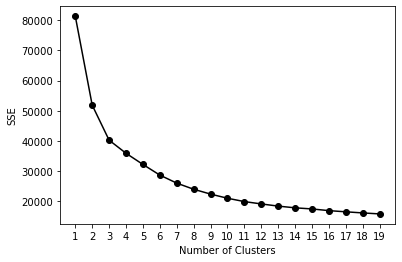

In [10]:
plt.plot(ks, sse, '-o', color='black')
plt.xticks(ks)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

From this I'm deciding to go with a K value of 5

In [99]:
cluster_model = KMeans(n_clusters=6)
cluster_model.fit(X)

cluster_model.inertia_

28669.792370747913

In [100]:
pickle.dump(cluster_model, open("cluster_model.sav", 'wb'))

In [101]:
# Make predictions
cluster_predictions = cluster_model.predict(X)

In [102]:
cluster_predictions.shape

(170653,)

In [103]:
# Assign cluster back to main dataset
data['cluster'] = cluster_predictions

In [104]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,2
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,4
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,2
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1


## Visualizing Clusters

In [105]:
# we can't visualize 8 features, so we break things down using PCA to get the most important features

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

In [106]:
pca_df = pd.DataFrame(pca_data)
pca_df['cluster'] = cluster_predictions

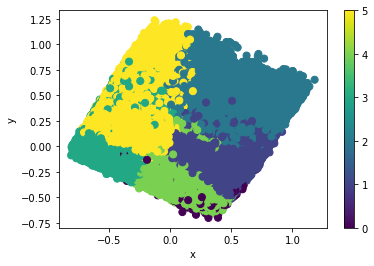

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(pca_df.iloc[:,0].values, pca_df.iloc[:,1].values, c=cluster_predictions, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)

Cluster 0, 1, 2 and 3 are well defined. Also, a lot of songs don't fall into cluster 4

### Analyse clusters

In [108]:
clu0 = X[data.cluster == 0]
clu0.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000,5281.000000
mean,0.525790,0.512363,0.677398,0.249550,0.003531,0.304689,0.648799,0.897181
std,0.169094,0.302085,0.070131,0.150271,0.035775,0.201282,0.061382,0.105306
min,0.000000,0.000505,0.312000,0.004710,0.000000,0.032500,0.332582,0.335000
25%,0.404000,0.243000,0.639000,0.158000,0.000000,0.152000,0.608739,0.904000
50%,0.542000,0.524000,0.696000,0.212000,0.000000,0.247000,0.647561,0.939000
75%,0.650000,0.785000,0.718000,0.296000,0.000000,0.382000,0.681591,0.953000
max,1.000000,0.995000,0.977000,0.996000,0.759000,0.985000,0.886540,0.970000


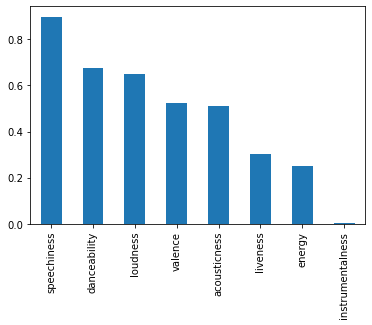

In [109]:
clu0[feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

Cluster 0 has more Acoustic and loud songs

In [110]:
clu1 = X[data.cluster == 1]
clu1.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,30818.000000,30818.000000,30818.000000,30818.000000,30818.000000,30818.000000,30818.000000,30818.000000
mean,0.291621,0.835840,0.420049,0.228454,0.034941,0.192203,0.711162,0.050416
std,0.143197,0.157344,0.141700,0.127495,0.086324,0.158018,0.074655,0.048361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.176000,0.751000,0.315000,0.131000,0.000002,0.104000,0.670394,0.032400
50%,0.290000,0.890000,0.420000,0.215000,0.000137,0.129000,0.719388,0.037800
75%,0.399000,0.963000,0.522000,0.310000,0.010300,0.218000,0.762446,0.047900
max,0.793000,0.996000,0.911000,0.997000,0.474000,0.998000,0.917563,0.634000


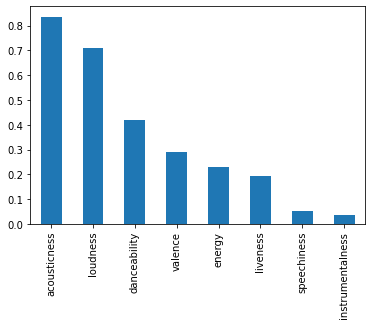

In [111]:
clu1[feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

Cluster 1 has more happy and loud songs

In [112]:
clu2 = X[data.cluster == 2]
clu2.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,24789.00000,24789.000000,24789.000000,24789.00000,24789.000000,24789.000000,24789.000000,24789.000000
mean,0.39488,0.895461,0.419770,0.23782,0.827761,0.181398,0.663074,0.059621
std,0.28668,0.171414,0.178499,0.17901,0.125198,0.148010,0.098236,0.058682
min,0.00000,0.000000,0.000000,0.00002,0.378000,0.022000,0.078302,0.000000
25%,0.13000,0.883000,0.289000,0.10000,0.776000,0.102000,0.606609,0.036900
50%,0.34800,0.972000,0.417000,0.20100,0.874000,0.122000,0.674779,0.043000
75%,0.63100,0.992000,0.548000,0.33300,0.916000,0.197000,0.733224,0.056000
max,0.99000,0.996000,0.934000,1.00000,1.000000,0.988000,1.000000,0.926000


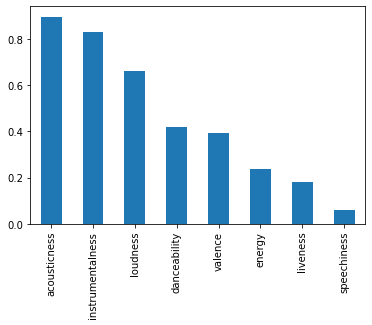

In [113]:
clu2[feat_cols].mean().sort_values(ascending=False).plot(kind='bar') # I'm guess rock or metal

In [114]:
clu3 = X[data.cluster == 3]
clu3.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,41796.000000,41796.000000,41796.000000,41796.000000,41796.000000,41796.000000,41796.000000,41796.000000
mean,0.767183,0.156030,0.660970,0.700562,0.050442,0.183116,0.812695,0.084565
std,0.129812,0.143827,0.133679,0.159299,0.164742,0.155441,0.052264,0.087003
min,0.396000,0.000001,0.159000,0.000685,0.000000,0.009670,0.502529,0.022200
25%,0.667000,0.029300,0.570000,0.586000,0.000000,0.081500,0.778216,0.035200
50%,0.770000,0.114000,0.666000,0.713000,0.000022,0.124000,0.820312,0.048100
75%,0.878000,0.257000,0.758000,0.829000,0.002560,0.246000,0.852807,0.086200
max,1.000000,0.654000,0.988000,0.999000,0.987000,1.000000,0.962853,0.675000


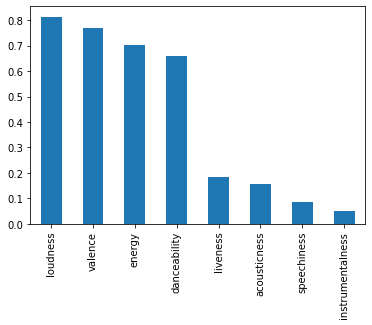

In [115]:
clu3[feat_cols].mean().sort_values(ascending=False).plot(kind='bar') # I'm guessing slow soundtracks

In [116]:
clu4 = X[data.cluster == 4]
clu4.describe()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
count,32818.000000,32818.000000,32818.000000,32818.000000,32818.000000,32818.000000,32818.000000,32818.000000
mean,0.725503,0.749606,0.604207,0.432964,0.040326,0.215358,0.767211,0.079624
std,0.149709,0.171977,0.123425,0.168470,0.108089,0.176721,0.056553,0.085599
min,0.216000,0.181000,0.127000,0.002780,0.000000,0.011600,0.349965,0.022400
25%,0.611250,0.613000,0.519000,0.311000,0.000000,0.101000,0.731990,0.035700
50%,0.727000,0.757000,0.607000,0.423000,0.000038,0.147000,0.771482,0.047200
75%,0.848000,0.903000,0.691000,0.543000,0.006880,0.279000,0.807047,0.078000
max,0.995000,0.996000,0.980000,0.991000,0.774000,0.997000,0.947819,0.705000


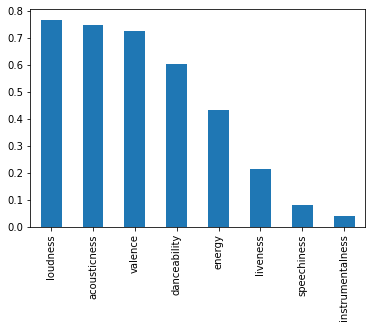

In [117]:
clu4[feat_cols].mean().sort_values(ascending=False).plot(kind='bar') # I'm guessing rap songs

## Classifying

In [118]:
df_classify = data[feat_cols + ['cluster']]

loudness = df_classify["loudness"].values
df_classify["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))

<ipython-input-118-a16f73686ad0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classify["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))


In [119]:
df_classify.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,cluster
0,0.0594,0.982,0.279,0.211,0.878000,0.665,0.624916,0.0366,2
1,0.9630,0.732,0.819,0.341,0.000000,0.160,0.744797,0.4150,4
2,0.0394,0.961,0.328,0.166,0.913000,0.101,0.707071,0.0339,2
3,0.1650,0.967,0.275,0.309,0.000028,0.381,0.793736,0.0354,1
4,0.2530,0.957,0.418,0.193,0.000002,0.229,0.781521,0.0380,1


In [120]:
X = df_classify[feat_cols]
y = df_classify['cluster']

### Split data

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

### Train models

0.9821569833875362


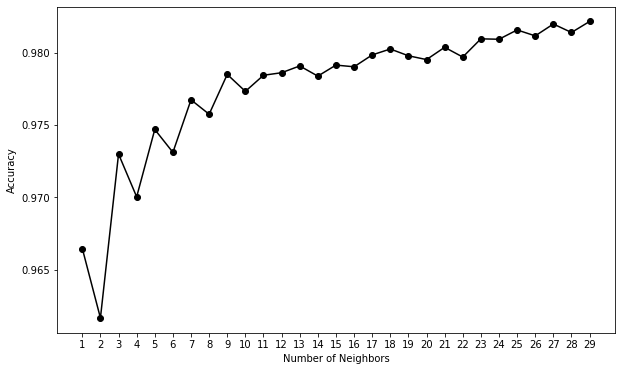

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

kn = range(1, 30)
accuracy = []
for i in kn:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
    
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(kn, accuracy, '-o', color='black')
plt.xticks(kn)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

print(max(accuracy))

0.9389118396765403


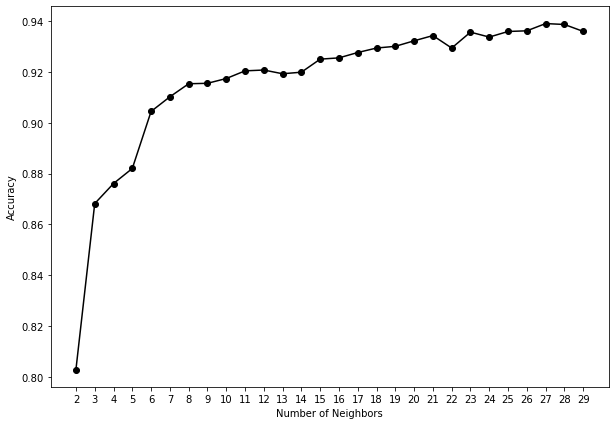

In [123]:
from sklearn.ensemble import RandomForestClassifier

ln = range(2, 30)
accuracy = []
for i in ln:
    rf = RandomForestClassifier(max_leaf_nodes=i)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
    
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(ln, accuracy, '-o', color='black')
plt.xticks(ln)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

print(max(accuracy))

In [124]:
from sklearn.svm import SVC

classification_model = SVC()
classification_model.fit(X_train, y_train)
pred = classification_model.predict(X_test)

In [125]:
accuracy_score(y_test, pred)

0.9963669391462306

In [126]:
confusion_matrix(y_test, pred)

array([[1078,    2,    0,    3,    6,    5],
       [   0, 6129,    3,    0,    6,   10],
       [   0,    0, 4920,    3,    2,    9],
       [   0,    0,    0, 8211,   11,   12],
       [   1,   16,    9,    2, 6543,    9],
       [   0,    2,    6,    5,    2, 7126]])

In [127]:
pickle.dump(classification_model, open("classification_model.sav", 'wb'))

## Clustering my liked songs

In [185]:
liked_songs = pd.read_json("./data/spotify-liked-songs.json")

In [186]:
df_liked = liked_songs[feat_cols]

loudness = df_liked["loudness"].values
df_liked["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))

df_liked.head()

<ipython-input-186-0a2eef45c731>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liked["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))


,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
0,0.437,0.09410,0.728,0.612,0.18800,0.3990,0.427254,0.0499
1,0.626,0.06060,0.503,0.935,0.83100,0.1340,0.598425,0.0368
2,0.157,0.11300,0.204,0.886,0.00450,0.3500,1.000000,0.0662
3,0.660,0.00897,0.655,0.971,0.00005,0.0771,0.955097,0.0833
4,0.265,0.00234,0.527,0.949,0.82900,0.1060,0.845925,0.0441


In [187]:
liked_songs['cluster'] = classification_model.predict(df_liked)

In [188]:
liked_songs.cluster.value_counts()

5    68
3    63
4    14
2    14
1     6
Name: cluster, dtype: int64

In [189]:
loudness = liked_songs["loudness"].values
liked_songs["loudness"] = minmaxScaler.fit_transform(loudness.reshape(-1, 1))

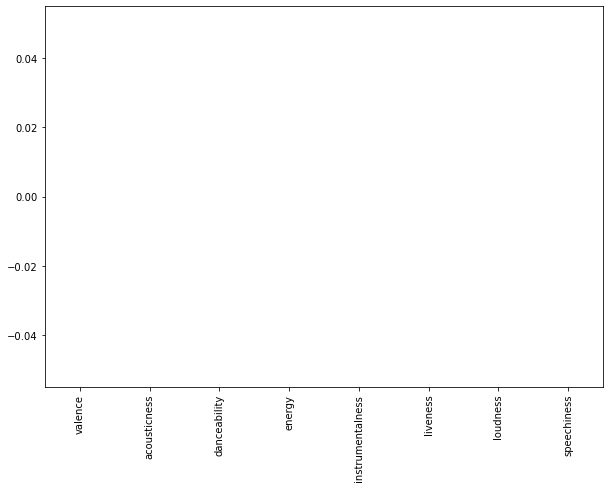

In [190]:
liked_songs[liked_songs['cluster'] == 0][feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

In [191]:
liked_songs[liked_songs['cluster'] == 0][['name', 'artist', 'speechiness']].sort_values("speechiness", ascending=False)

,name,artist,speechiness


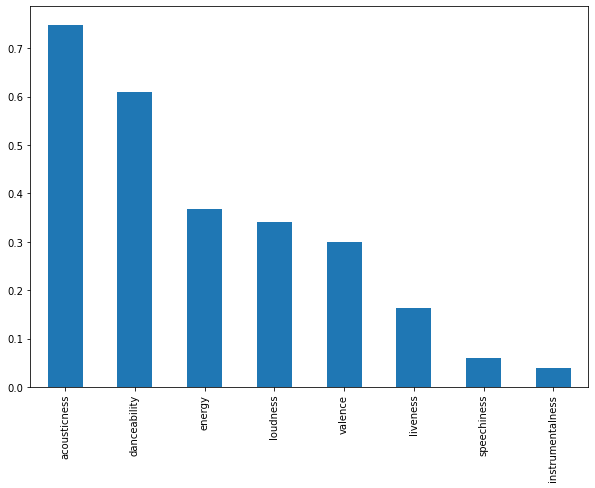

In [192]:
liked_songs[liked_songs['cluster'] == 1][feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

In [193]:
# for cluster one instrumental and danceability are the highest factors, so we sort by that
liked_songs[liked_songs['cluster'] == 1][['name', 'acousticness']].sort_values("acousticness", ascending=False)

,name,acousticness
57,Hometown Glory,0.962
67,Toothpaste Kisses,0.904
117,Nobody,0.776
75,Gooey,0.736
39,Cable,0.573
41,Fast Talk,0.543


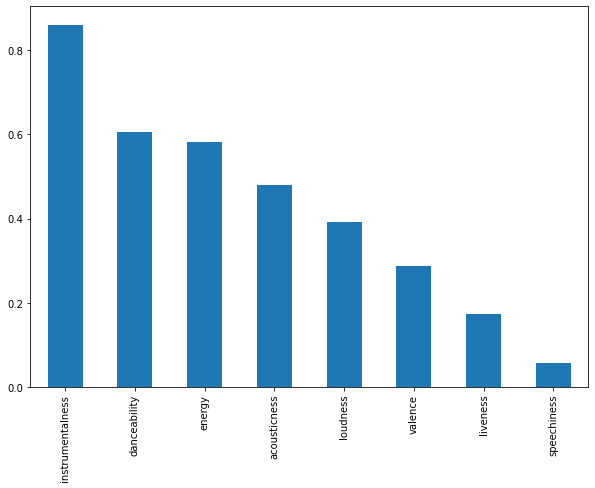

In [194]:
liked_songs[liked_songs['cluster'] == 2][feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

In [195]:
liked_songs[liked_songs['cluster'] == 2][['name', 'instrumentalness']].sort_values("instrumentalness", ascending=False)

,name,instrumentalness
97,The Last of Us,0.928
22,Ya No Hay Verano,0.915
12,Like this,0.909
112,Aurora,0.905
94,Run,0.897
113,Bunny,0.886
95,Apollo,0.877
111,Saviour,0.859
96,Battlefield V Legacy Theme,0.852
43,Feel Good (feat. Khruangbin),0.840


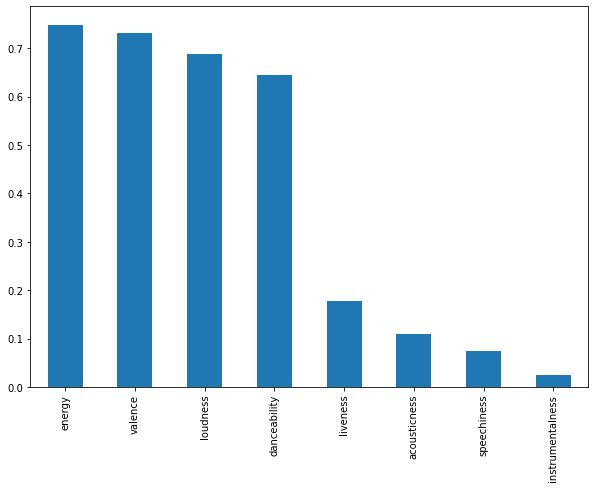

In [196]:
liked_songs[liked_songs['cluster'] == 3][feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

In [197]:
liked_songs[liked_songs['cluster'] == 3][['name', 'energy']].sort_values("energy", ascending=False)

,name,energy
3,That’s All It Is,0.971
107,Blue (Da Ba Dee) - Gabry Ponte Ice Pop Radio,0.969
81,Tokyo Summer,0.955
29,Hammock,0.954
147,Young Love (feat. Laura Marling),0.942
...,...,...
56,Using,0.526
66,3 Nights,0.518
24,Glu,0.440
44,Softly,0.436


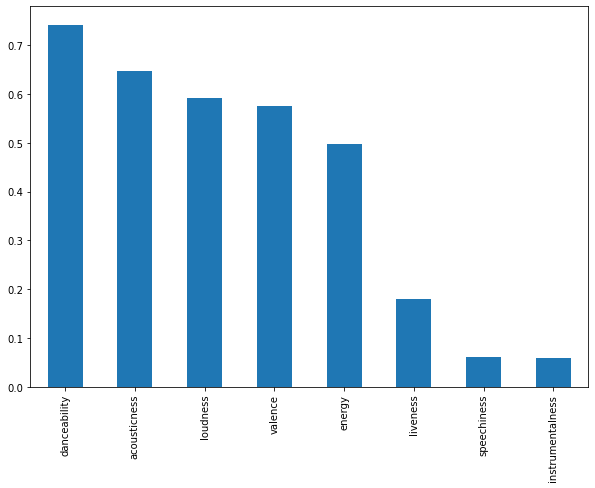

In [198]:
liked_songs[liked_songs['cluster'] == 4][feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

In [199]:
liked_songs[liked_songs['cluster'] == 4][['name', 'danceability']].sort_values("danceability", ascending=False)

,name,danceability
101,Hunnybee,0.956
7,anemone,0.854
20,Stop Selling Her Drugs (feat. Dominic Fike),0.847
60,Dance Monkey,0.824
18,Small Town Girl,0.814
32,Blue Coloured Mountain,0.811
45,On the Low,0.793
157,Multi-Love,0.784
70,Choirs,0.713
118,Still Beating,0.709


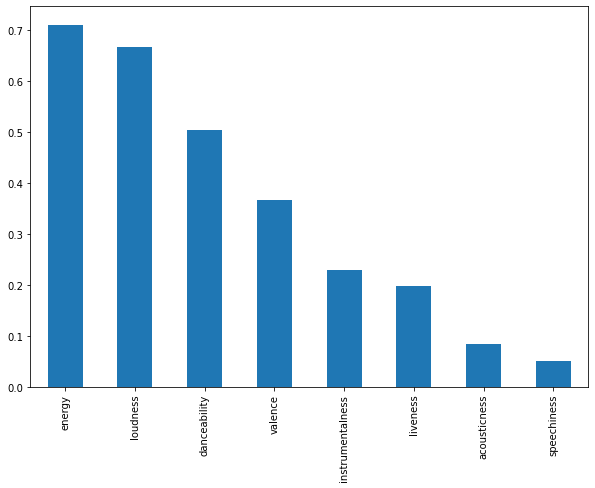

In [200]:
liked_songs[liked_songs['cluster'] == 5][feat_cols].mean().sort_values(ascending=False).plot(kind='bar')

In [201]:
liked_songs[liked_songs['cluster'] == 5][['name', 'energy']].sort_values("energy", ascending=False)

,name,energy
26,Spring Has Sprung,0.989
105,Sandstorm,0.982
119,Are You Gonna Be My Girl,0.953
4,Hypnagogic (I Can't Wait),0.949
1,Annie Blue,0.935
...,...,...
127,Pneumonia,0.445
115,So Tired,0.398
86,ur phone,0.355
126,Waves,0.320


In [202]:
factors = ['', 'acousticness', 'instrumentalness', 'valence', 'danceability', 'energy']
liked_songs['main_factor'] = liked_songs['cluster'].apply(lambda x: factors[x])

In [203]:
liked_songs.to_json("./output/my_clustered_liked_songs.json", orient ='records')